In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

/home/gfrost/anaconda3/envs/penguin/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
B = 8
T = 100
C = 5

y_hat = torch.randn((B*T, C))
log_y_hat = F.log_softmax(y_hat, dim=-1)
y = F.softmax(torch.randn((B*T, C)), dim=-1)

In [3]:
%%time
F.cross_entropy(y_hat, y)

CPU times: user 86.3 ms, sys: 0 ns, total: 86.3 ms
Wall time: 19.3 ms


tensor(1.9683)

In [4]:
sample_weights = torch.ones(B*T)
sample_weights[400:] = 0.5

In [5]:
%%time
-1*(torch.mean(sample_weights*torch.bmm(y.unsqueeze(dim=-2), log_y_hat.unsqueeze(dim=-1)).squeeze()))

CPU times: user 55.4 ms, sys: 0 ns, total: 55.4 ms
Wall time: 14.3 ms


tensor(1.4797)

In [9]:
torch.load('../logs/label_weights.pt')

tensor([1.0000, 2.4649, 4.7761, 5.3335, 5.6844])

In [11]:

lengths = torch.randint(50, 101, size=(8,))

indexs = torch.arange(100).unsqueeze(dim=0).repeat(lengths.size(0), 1).type_as(lengths)
lengths = lengths.unsqueeze(dim=-1).repeat(1, 100)
padding_mask = indexs > lengths
padding_mask = padding_mask.to(torch.uint8)

In [21]:
boradcast_mask = torch.matmul(padding_mask.unsqueeze(dim=-1), padding_mask.unsqueeze(dim=-2))

In [20]:
padding_mask[0]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1], dtype=torch.uint8)

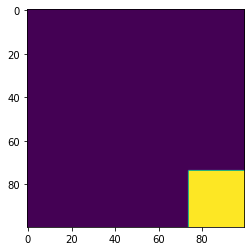

In [17]:
plt.imshow(boradcast_mask[0])

In [14]:
# ckpt = torch.load('../logs/final/blstm/lightning_logs/version_0/checkpoints/35-0.00-0.00.ckpt')
ckpt = torch.load('../logs/final/blstm/lightning_logs/version_1/checkpoints/6-0.00-0.00.ckpt')

In [15]:
ckpt['state_dict'].keys()

odict_keys(['encoder.embedding_layer.weight_ih_l0', 'encoder.embedding_layer.weight_hh_l0', 'encoder.embedding_layer.bias_ih_l0', 'encoder.embedding_layer.bias_hh_l0', 'encoder.embedding_layer.weight_ih_l0_reverse', 'encoder.embedding_layer.weight_hh_l0_reverse', 'encoder.embedding_layer.bias_ih_l0_reverse', 'encoder.embedding_layer.bias_hh_l0_reverse', 'encoder.embedding_layer.weight_ih_l1', 'encoder.embedding_layer.weight_hh_l1', 'encoder.embedding_layer.bias_ih_l1', 'encoder.embedding_layer.bias_hh_l1', 'encoder.embedding_layer.weight_ih_l1_reverse', 'encoder.embedding_layer.weight_hh_l1_reverse', 'encoder.embedding_layer.bias_ih_l1_reverse', 'encoder.embedding_layer.bias_hh_l1_reverse', 'encoder.embedding_fc.weight', 'encoder.embedding_fc.bias', 'encoder.embedding_bn.running_mean', 'encoder.embedding_bn.running_var', 'encoder.embedding_bn.num_batches_tracked', 'encoder.blstm_layer.weight_ih_l0', 'encoder.blstm_layer.weight_hh_l0', 'encoder.blstm_layer.bias_ih_l0', 'encoder.blstm_la

In [2]:
preds = torch.load('/home/gfrost/projects/penguin/logs/results/wavlm-large_predictions_dcfg_0.pt')

In [26]:
y_hat = preds[0]
y = preds[1]

In [31]:
accuracy = (torch.softmax(y_hat, dim=-1).argmax(dim=-1) == y).sum().float() / float(y.size(0))

In [30]:
torch.softmax(y_hat, dim=-1).argmax(dim=-1).min()

tensor(0)

In [32]:
accuracy

tensor(0.5293)